# Evaluation for minimal example *file*

In [1]:
# load data
import os
import numpy as np

best_sol_path = "experiments/1_qubit_model"
print(best_sol_path)

experiments/1_qubit_model


## Data analysis for results

In [2]:
import json
res_path = os.path.join(best_sol_path,"results.json")
with open(res_path) as json_file:
    results = json.load(json_file)

In [3]:
from pprint import pprint
pprint(results)

{'file account.': [1, 0.8301],
 'file application.': [1, 0.7852],
 'file charge_n.': [1, 0.7422],
 'file declaration.': [1, 0.6914],
 'file lawsuit.': [1, 0.791],
 'file nail.': [1, 0.8906],
 'file shank.': [1, 0.5508],
 'file steel.': [1, 0.7246],
 'file tooth.': [1, 0.8125],
 'register account.': [1, 0.875],
 'register application.': [1, 0.8418],
 'register charge_n.': [1, 0.9395],
 'register declaration.': [1, 0.918],
 'register lawsuit.': [1, 0.8887],
 'register nail.': [0, 0.1289],
 'register shank.': [0, 0.0117],
 'register steel.': [0, 0.1055],
 'register tooth.': [0, 0.1035],
 'smooth account.': [0, 0.1328],
 'smooth application.': [0, 0.1758],
 'smooth charge_n.': [0, 0.0957],
 'smooth declaration.': [0, 0.1133],
 'smooth lawsuit.': [0, 0.1035],
 'smooth nail.': [1, 0.8711],
 'smooth shank.': [1, 1.0195],
 'smooth steel.': [1, 0.9375],
 'smooth tooth.': [1, 0.8398]}


In [4]:
from scipy.stats import spearmanr
# convert to numpy array
results_np = np.array([results[r] for r in results])
spearmanr(results_np)

SpearmanrResult(correlation=0.8171819011346155, pvalue=1.978525280597577e-07)

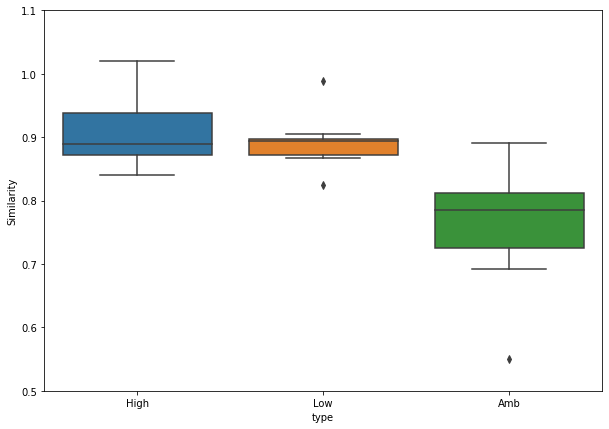

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# create boxplots
results_high = [results[r][1] for r in results if (results[r][0]==1 and r.split(" ")[0] != "file")]
highs = ["High" for i in range(len(results_high))]
results_low = [1-results[r][1] for r in results if results[r][0]==0 and r.split(" ")[0] != "file"]
lows = ["Low" for i in range(len(results_low))]
results_amb = [results[r][1] for r in results if (r.split(" ")[0] == "file")]
ambs = ["Amb" for i in range(len(results_amb))]
data = pd.DataFrame({"Similarity": results_high+results_low+results_amb, "type": highs+lows+ambs})


dims = (10,7)
fig, ax = plt.subplots(figsize=dims)
plt.rcParams["font.size"] = "18"
ax = sns.boxplot(ax=ax, x="type", y="Similarity", data=data)
ax.set(ylim=(0.5, 1.1));


## Visualize vector on Bloch Sphere

In [6]:
from discopy.quantum import Ket, H, Rx, Ry, Rz, CX, sqrt, X, Circuit
from random import uniform
from math import pi


# Ansätze for 1-qubit states
def un_amb_verb_ansatz(p):
    return Ket(p[0])

def amb_verb_ansatz(p):
    return Ket(0) >> \
        Rx(p[0])

def noun_ansatz(p):
    return Ket(0) >> \
        Rx(p[0]) >> \
        Rz(p[1])


n_qubits_ansatz = 1
n_noun_params = 2
n_amb_params = 0


In [7]:
params_amb_verbs_path = os.path.join(best_sol_path,"parameters_amb_verbs.json")
with open(params_amb_verbs_path) as json_file:
    params_amb_verbs = json.load(json_file)
print(params_amb_verbs)

params_unamb_verbs_path = os.path.join(best_sol_path,"parameters_unamb_verbs.json")
with open(params_unamb_verbs_path) as json_file:
    params_unamb_verbs = json.load(json_file)
print(params_unamb_verbs)

params_nouns_path = os.path.join(best_sol_path,"params_nouns.json")
with open(params_nouns_path) as json_file:
    params_nouns = json.load(json_file)
print(params_nouns)


{'file': [0.7532070027559199]}
{'smooth': [0], 'register': [1]}
{'lawsuit': [0.6104965750424485, 0.500314402569479], 'charge_n': [0.6097636601427943, 0.5848434117311194], 'application': [0.3838719870204181, 0.06449927652250076], 'tooth': [0.8921968052838787, 0.43274945911864043], 'shank': [0.9614707545274812, 0.2700827067577516], 'declaration': [0.3974982784590257, 0.11324664164855666], 'account': [0.3834347171300137, 0.9982755866703608], 'nail': [0.10911043684252048, 0.9823505566467077], 'steel': [0.10498870851023664, 0.8914302225207631]}


In [8]:
import qutip
from qutip.expect import expect
from qutip.operators import sigmax, sigmay, sigmaz
from qutip import Qobj

def convert_to_bloch_vec(states):
    if isinstance(states, Qobj):
        states = [states]
    
    vecs = []
    for state in states:
        vec = [expect(sigmax(), state),
                expect(sigmay(), state),
                expect(sigmaz(), state)]
        vecs.append(vec)
    return np.transpose(np.array(vecs))


vec = qutip.Qobj(amb_verb_ansatz(params_amb_verbs["file"]).eval().array)
unamb_verb_states = [qutip.Qobj(un_amb_verb_ansatz(params_unamb_verbs[verb]).eval().array) for verb in params_unamb_verbs]
noun_states_reg = convert_to_bloch_vec([qutip.Qobj(noun_ansatz(params_nouns[noun]).eval().array) for noun in params_nouns if results["register "+noun+"."][0]==1])
noun_states_smo = convert_to_bloch_vec([qutip.Qobj(noun_ansatz(params_nouns[noun]).eval().array) for noun in params_nouns if results["smooth "+noun+"."][0]==1])


In [9]:
vec

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.71419494+0.j        ]
 [ 0.        -0.69994684j]]

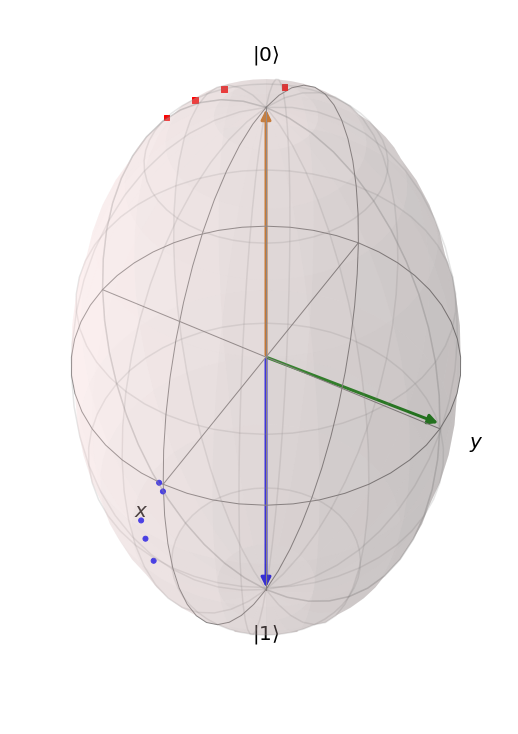

In [10]:
%matplotlib inline
b = qutip.Bloch(figsize=(7, 10))
b.add_states(vec)
b.add_states(unamb_verb_states)
b.add_points(noun_states_reg,meth="s")
b.add_points(noun_states_smo,meth="s")
b.render()

## Make animation with evolution data

In [11]:
params_evo_path = os.path.join(best_sol_path,"params_evolution_noisy.json")
with open(params_evo_path) as json_file:
    params_evolution = json.load(json_file)

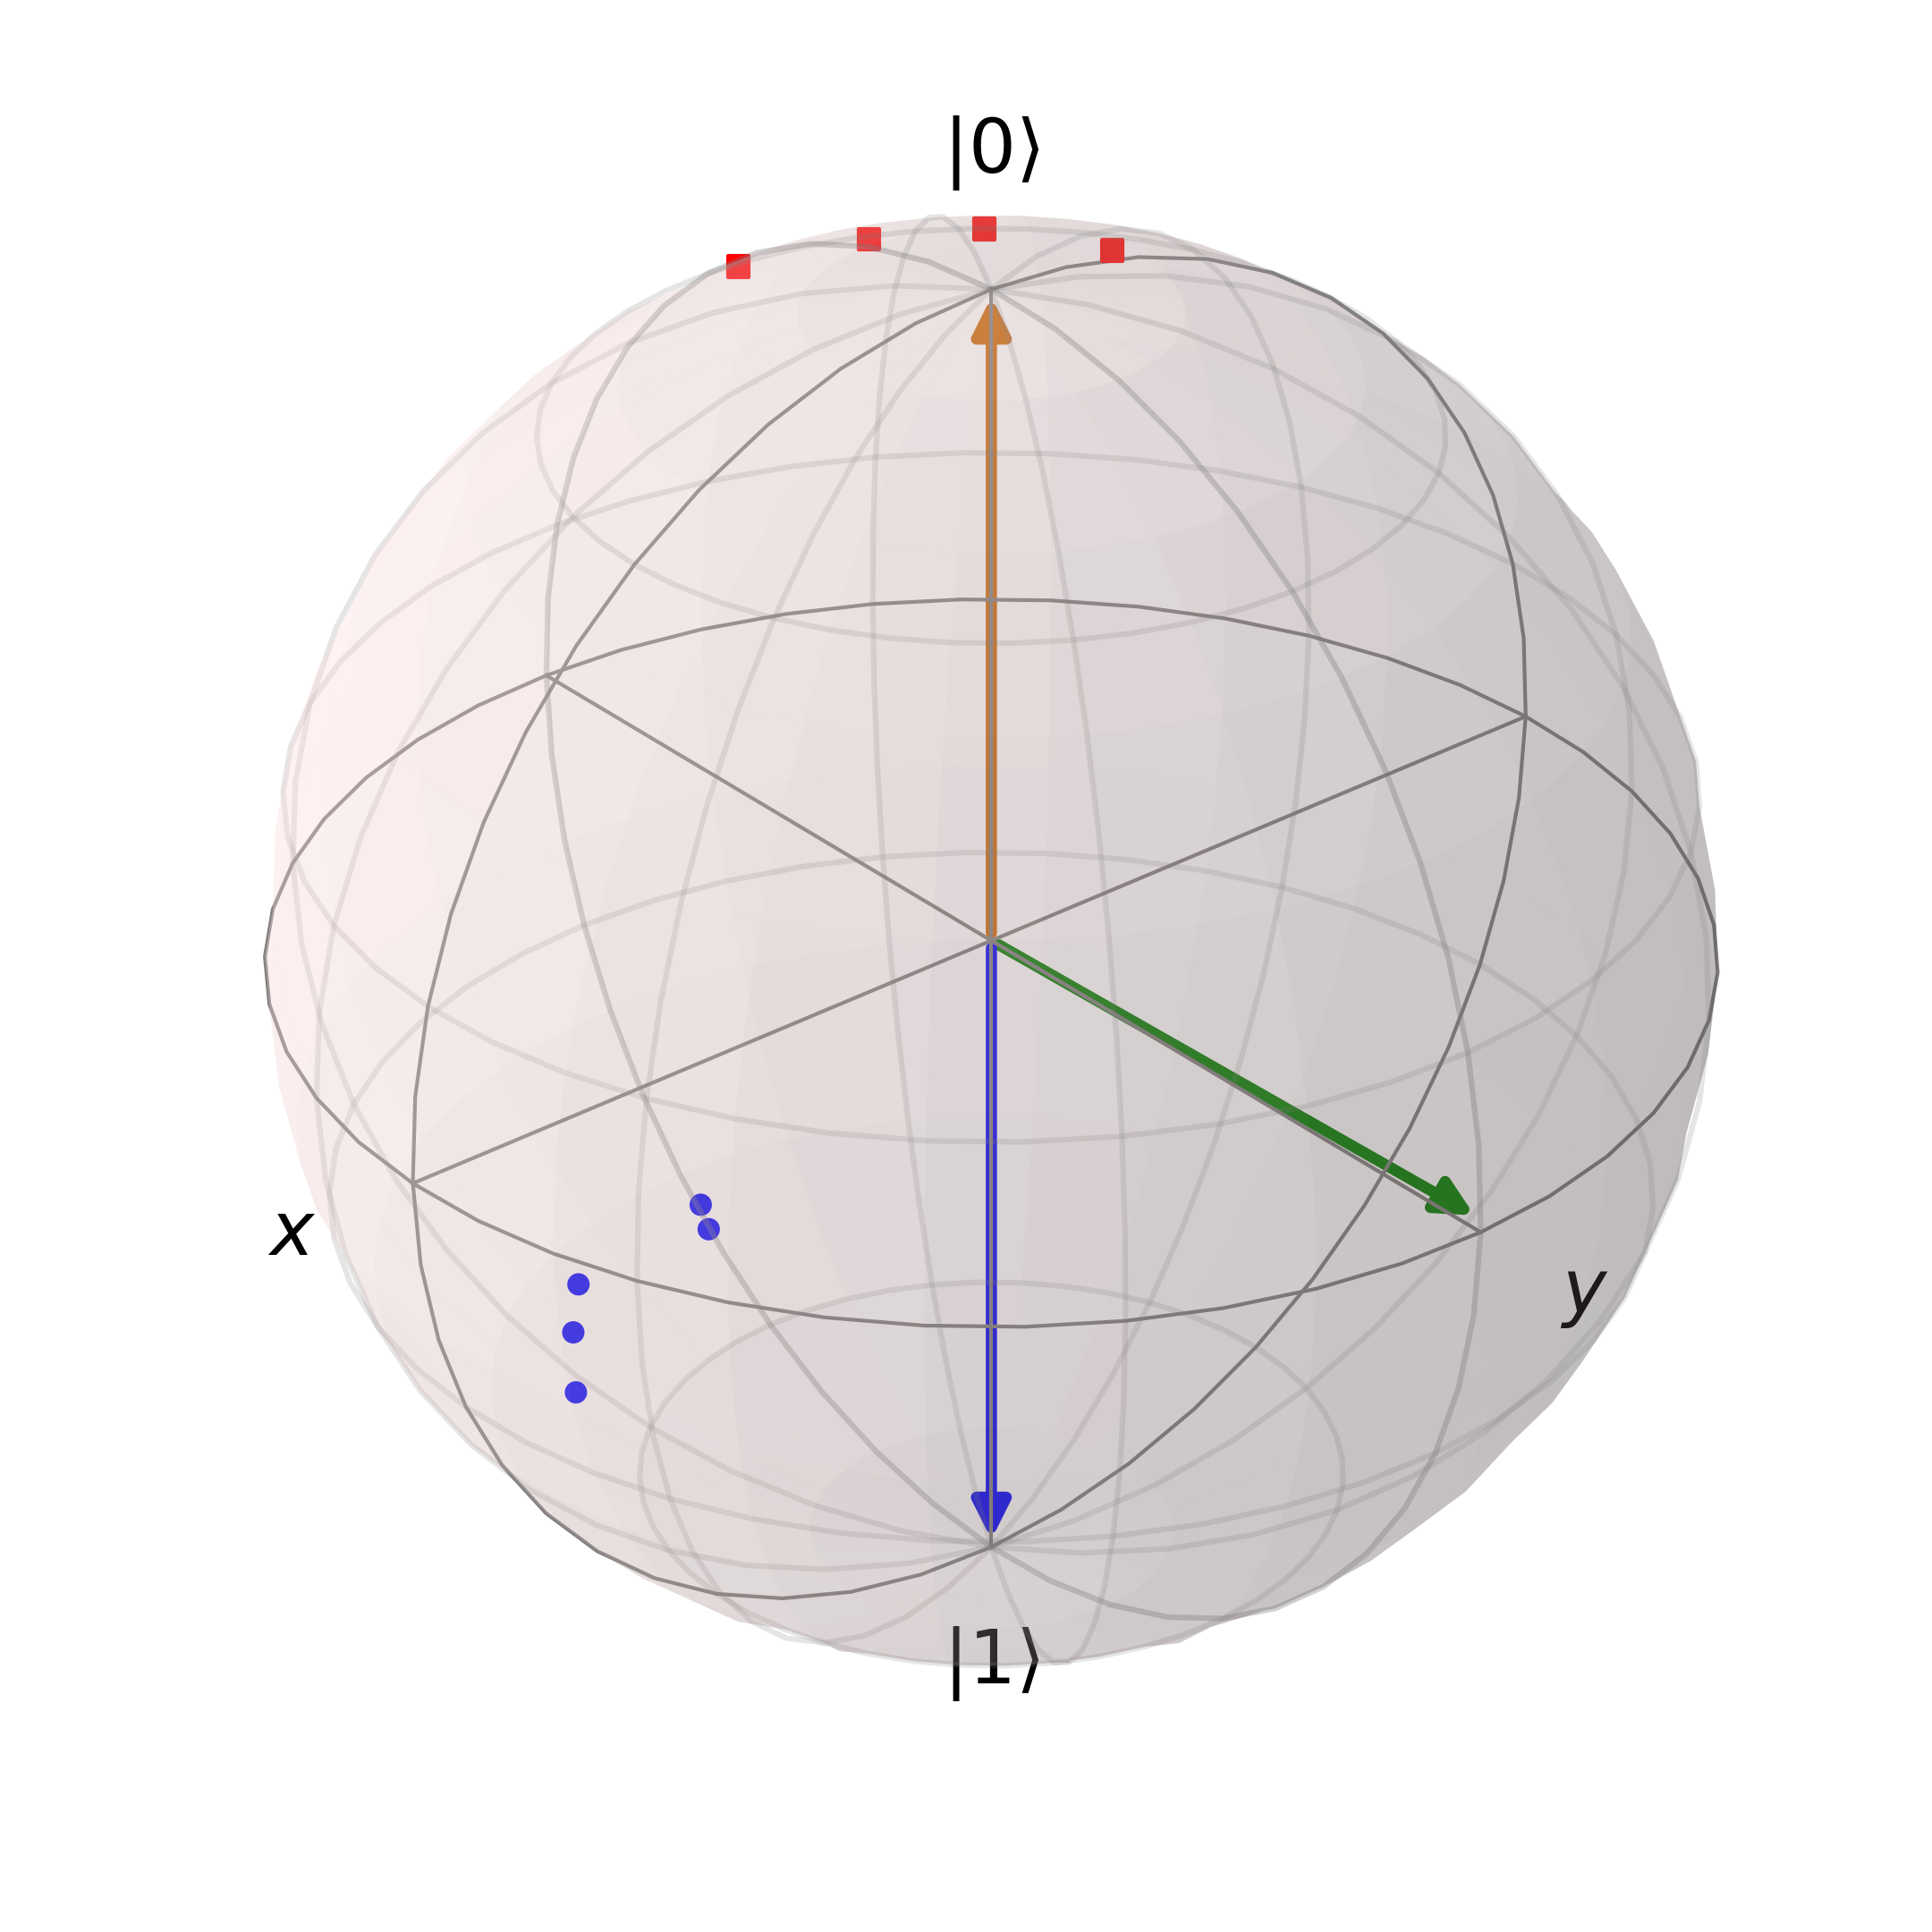

<Figure size 360x360 with 0 Axes>

In [12]:
import matplotlib
from matplotlib import pyplot, animation
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure(figsize=(7,7),dpi=300)
ax = Axes3D(fig,azim=-40,elev=30)
sphere = qutip.Bloch(axes=ax)

def animate(frame):
    params_amb_verbs = params_evolution[frame]["amb_verbs"]
    params_nouns = params_evolution[frame]["nouns"]

    vec = qutip.Qobj(amb_verb_ansatz(params_amb_verbs["file"]).eval().array)
    unamb_verb_states = [qutip.Qobj(un_amb_verb_ansatz(params_unamb_verbs[verb]).eval().array) for verb in params_unamb_verbs]
    noun_states_reg = convert_to_bloch_vec([qutip.Qobj(noun_ansatz(params_nouns[noun]).eval().array) for noun in params_nouns if results["register "+noun+"."][0]==1])
    noun_states_smo = convert_to_bloch_vec([qutip.Qobj(noun_ansatz(params_nouns[noun]).eval().array) for noun in params_nouns if results["smooth "+noun+"."][0]==1])
    
    sphere.clear()
    sphere.add_states(vec)
    sphere.add_states(unamb_verb_states)
    sphere.add_points(noun_states_reg, meth="s")
    sphere.add_points(noun_states_smo, meth="s")
    sphere.make_sphere()

    return ax

def init():
   return ax

ani = animation.FuncAnimation(fig, animate, list(params_evolution.keys())[0:-1],
                              init_func=init, repeat=False);
ani.save('bloch_sphere.mp4', fps=30);

## Plot SPSA fit

Text(0.5, 1.0, 'SPSA optimization 1-qubit example')

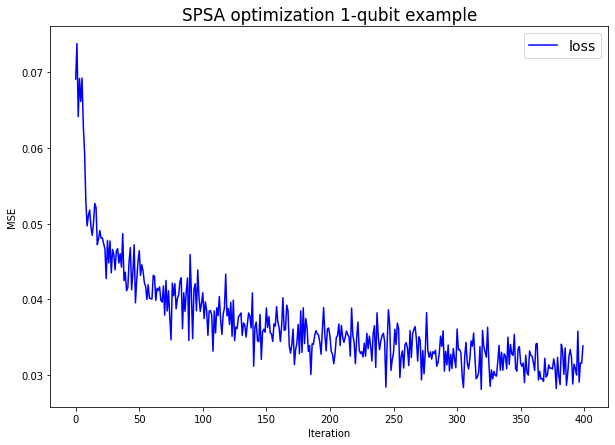

In [13]:
import matplotlib.pyplot as plt

loss = params_evolution["loss"]

dims = (10,7)
fig, ax = plt.subplots(figsize=dims)
plt.rcParams["font.size"] = "14"
plt.plot(range(len(loss)), loss, '-b', label='loss')
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.legend(loc='upper right')
plt.title("SPSA optimization 1-qubit example")

## Plot blochsphere process

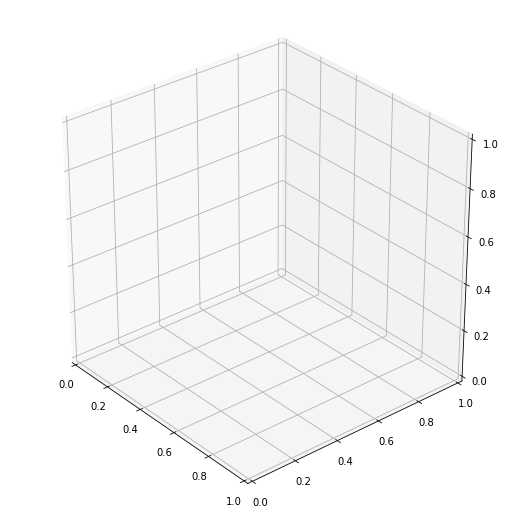

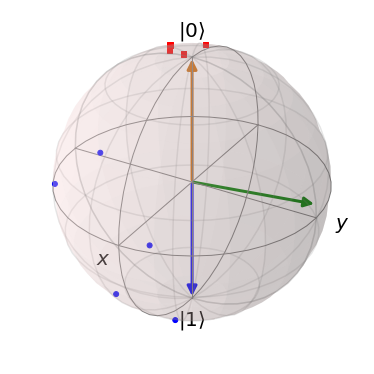

In [14]:
%matplotlib inline
frames = list(params_evolution.keys())[0:-1]
frames_to_plot = [frames[0], frames[49], frames[99], frames[199]]

dims = (7,7)
fig, ax = plt.subplots(figsize=dims)
ax = Axes3D(fig,azim=-40,elev=30)
sphere = qutip.Bloch(axes=ax)

frame = frames_to_plot[0]
params_amb_verbs = params_evolution[frame]["amb_verbs"]
params_nouns = params_evolution[frame]["nouns"]

vec = qutip.Qobj(amb_verb_ansatz(params_amb_verbs["file"]).eval().array)
unamb_verb_states = [qutip.Qobj(un_amb_verb_ansatz(params_unamb_verbs[verb]).eval().array) for verb in params_unamb_verbs]
noun_states_reg = convert_to_bloch_vec([qutip.Qobj(noun_ansatz(params_nouns[noun]).eval().array) for noun in params_nouns if results["register "+noun+"."][0]==1])
noun_states_smo = convert_to_bloch_vec([qutip.Qobj(noun_ansatz(params_nouns[noun]).eval().array) for noun in params_nouns if results["smooth "+noun+"."][0]==1])

sphere.clear()
sphere.add_states(vec)
sphere.add_states(unamb_verb_states)
sphere.add_points(noun_states_reg, meth="s")
sphere.add_points(noun_states_smo, meth="s")
sphere.render()